## **데이터 전처리 및 환경 세팅**

In [28]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [29]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from gensim.models.word2vec import Word2vec

data = pd.read_csv('세종고_급식_전처리리.csv')

In [30]:
data = data.drop('Unnamed: 0', axis=1)
#data = data[1500:]
data = data.replace("[^가-힣 ]","")

In [31]:
data

,요리명
0,찹쌀밥 소프트치즈케익 참치김치찌개 계란후라이 스팸구이 김구이 텐저린
1,잡곡밥 얼큰어묵국 상추쑥갓겉절이 돈육고추장오븐구이 배추김치 귤 꿀설기
2,스팸마요덮밥 바나나미니도넛 유부된장국 포도발효초음료
3,찹쌀밥 브라우니 애호박고추장찌개 상추부추겉절이 김치 돼지불고기 프로바이오틱
4,현미밥 두부김치국 양상추샐러드 치즈돈까스 감자튀김 배추김치 요구르트
...,...
1614,통밀쌀밥 황태채콩나물국 등뼈시래기찜 오이부추무침 부추잡채 석박지 파인애플푸딩
1615,하이라이스 돈가스샐러드 두부김치국 깍두기 요플레 전통감자부각
1616,찹쌀밥 쇠고기두부탕국 비엔나치즈떡볶음 달걀후라이 배추김치 김구이 윌
1617,쥐눈이콩밥 미트볼펜네조림 몽글순두부짬뽕탕 새송이버섯들깨볶음 와플생크림 배추김치


## **필요 없음(정수 인코딩)**

In [32]:
X_data = data['요리명']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) 
sequences = tokenizer.texts_to_sequences(X_data) 

In [33]:
print(sequences)
max_len1 = max(len(l) for l in sequences)
max_len1

[[1, 363, 25, 45, 29, 28, 55], [127, 364, 552, 925, 2, 89, 1308], [926, 927, 365, 928], [1, 929, 930, 436, 97, 98, 173], [195, 36, 90, 437, 699, 2, 32], [1, 222, 1309, 553, 3, 32], [1, 309, 16, 41, 13, 438, 11, 2, 89], [174, 47, 257, 439, 366, 2, 14], [1, 26, 931, 367, 700, 12], [1, 65, 66, 36, 223, 701, 55], [1310, 70, 128, 1311, 2, 310], [1, 99, 258, 1312, 147, 702, 703], [1, 27, 110, 128, 704, 173], [440, 148, 441, 12, 1313], [1, 932, 311, 23, 554, 224, 15], [1, 555, 368, 933, 1314, 13, 442, 32], [1, 149, 225, 223, 1315, 89], [1, 259, 1316, 934, 4, 56], [1, 1317, 556, 97, 705, 310, 111], [1, 100, 1318, 706, 935, 2], [1319, 368, 369, 936, 9], [1, 196, 1320, 260, 929, 55], [261, 13, 91, 707, 2, 1321], [1, 1322, 175, 937, 443, 4], [1, 363, 312, 45, 29, 28, 22], [1323, 444, 938, 2, 22], [1, 939, 708, 1324, 78, 3], [1, 557, 262, 558, 313, 559], [129, 26, 226, 89, 560, 11], [1, 940, 706, 1325, 2], [8, 1326, 128, 2, 561, 46, 941], [57, 70, 2, 22, 559], [1, 370, 1327, 226, 227, 2], [1, 314,

16

In [34]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'찹쌀밥': 1, '배추김치': 2, '깍두기': 3, '석박지': 4, '흑미밥': 5, '보쌈김치': 6, '바나나': 7, '죽': 8, '열무김치': 9, '떡국': 10, '케첩': 11, '총각김치': 12, '양념장': 13, '사과': 14, '쌈장': 15, '쇠고기미역국': 16, '콘푸레이크': 17, '찰보리밥': 18, '부대찌개': 19, '과일쥬스': 20, '단무지': 21, '엔요': 22, '배추겉절이': 23, '머스터드': 24, '참치김치찌개': 25, '얼큰콩나물국': 26, '쇠고기무국': 27, '김구이': 28, '스팸구이': 29, '강황쌀밥': 30, '플리또': 31, '요구르트': 32, '맑은콩나물국': 33, '조각파인애플': 34, '수박': 35, '두부김치국': 36, '상추쌈': 37, '설렁탕': 38, '김치볶음': 39, '골드파인애플': 40, '연두부찜': 41, '바나나우유': 42, '무말랭이김치': 43, '팽이버섯미소장국': 44, '계란후라이': 45, '시리얼': 46, '등뼈감자탕': 47, '치즈불닭': 48, '닭곰탕': 49, '나박김치': 50, '새송이': 51, '통마늘구이': 52, '우동국물': 53, '달걀후라이': 54, '텐저린': 55, '딸기요플레': 56, '잔치국수': 57, '오징어김치전': 58, '홍국쌀밥': 59, '딸기우유': 60, '모닝빵': 61, '비빔막국수': 62, '오렌지쥬스': 63, '딸기쨈': 64, '초코칩': 65, '트위스트': 66, '차수수밥': 67, '진미채엿장조림': 68, '짜먹는요구르트': 69, '밥': 70, '등뼈우거지국': 71, '콩나물무침': 72, '건새우아욱된장국': 73, '통등심돈까스': 74, '김가루': 75, '차조쌀밥': 76, '기장쌀밥': 77, '언양식바싹불고기': 78, '추가밥': 79, '참치김치볶음': 80, '쵸코우유': 81, '현미찹쌀밥': 82, '오향장육': 

## **데이터 토큰화 및 Word2Vec 학습**

In [35]:
tokenized_data = []

for sentence in data['요리명']:
    temp = sentence.split()
    temp = [word for word in temp] # 불용어 제거
    tokenized_data.append(temp)
max_len = max(len(l) for l in tokenized_data)
max_len

16

In [36]:
!pip install --upgrade gensim

In [137]:
model = Word2Vec(tokenized_data, vector_size = 150, window = max_len, min_count = 4, epochs=200)


In [138]:
model.wv.vectors.shape

(698, 150)

In [145]:
print(model.wv.most_similar('참치김치찌개'))

[('돼지갈비김치찌개', 0.4976036846637726), ('등뼈우거지국', 0.46004194021224976), ('부대찌개', 0.4542653560638428), ('얼갈이된장국', 0.44158828258514404), ('두부김치국', 0.4306357502937317), ('건새우아욱된장국', 0.419702410697937), ('쇠고기미역국', 0.4145335853099823), ('육개장', 0.3974105715751648), ('맑은콩나물국', 0.380008339881897), ('돈육김치찌개', 0.3740229308605194)]


## **시각화**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


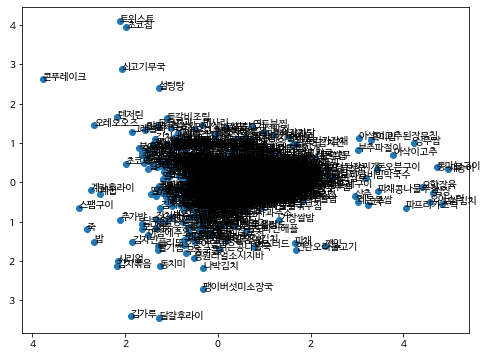

In [40]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 


# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그린다
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))
 
# 단어벡터를 구한다.
word_vectors = model.wv

vocabs            = word_vectors.index_to_key
print(word_vectors)

word_vectors_list = [word_vectors[i] for i in range(len(word_vectors))]


from sklearn.decomposition import PCA
pca = PCA(n_components=3)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

# 결과2
plot_2d_graph(vocabs, xs, ys)
 
# 최종 모델을 저장한다.
model.save('word2vec.model')
 
# 저장한 모델을 읽어서 이용한다.
model = Word2Vec.load('word2vec.model')
